In [21]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-02-02 20:53:20,085: Default instance: ibm-q/open/main


Traceback (most recent call last):
  Cell In[21], line 15
    result = Sampler().run(circuits).result()
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/sampler.py:93 in __init__
    BasePrimitive.__init__(self, backend=backend, session=session, options=options)
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/base_primitive.py:121 in __init__
    raise ValueError(
ValueError: A backend or session must be specified when not using ibm_cloud channel.

Use %tb to get the full traceback.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.monitor import job_monitor

from qiskit.tools.visualization import plot_histogram

In [ ]:
IBMQ.load_account()

In [ ]:
n = 13

In [ ]:
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n)


qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Apply Hadamard gates to all input queries
for i in range(n):
    djCircuit.h(qr[i])

djCircuit.x(qr[n])
djCircuit.h(qr[n])
    

djCircuit.barrier()

if oracleType == 0: #If oracleType is "0" return oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.iden(qr[n])
else: # Else, return the inner product of the input with a non-zero bitstring 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        

djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

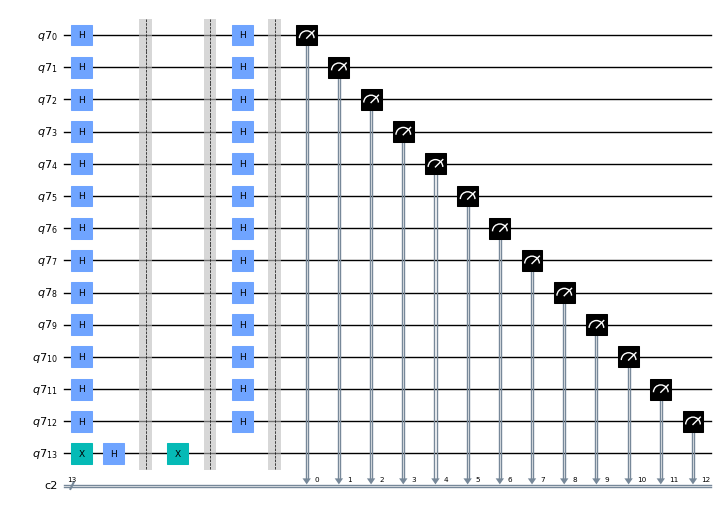

In [22]:
djCircuit.draw(output='mpl',scale=0.5)

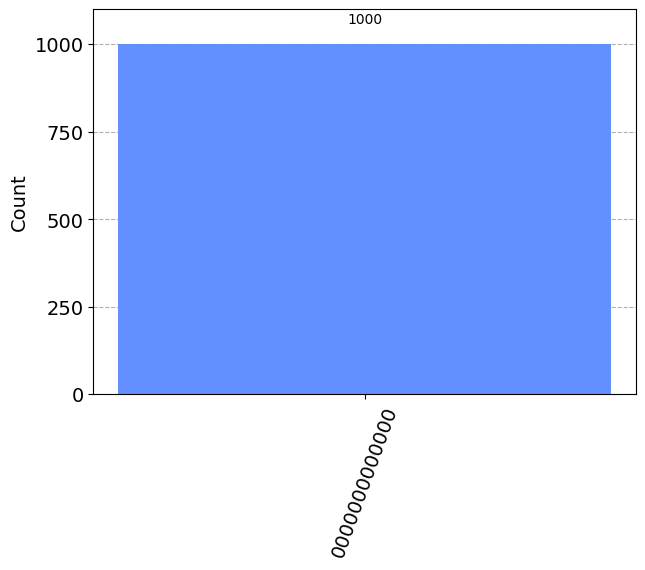

In [23]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
job = execute(djCircuit, backend=backend, shots=shots)
results = job.result() 
answer = results.get_counts()

plot_histogram(answer)

In [33]:
# Experimenting on actual device

my_provider = IBMQ.get_provider()
backend  = my_provider.get_backend('ibm_kyoto')
djCompiled = transpile(djCircuit, backend=backend, optimization_level=1)

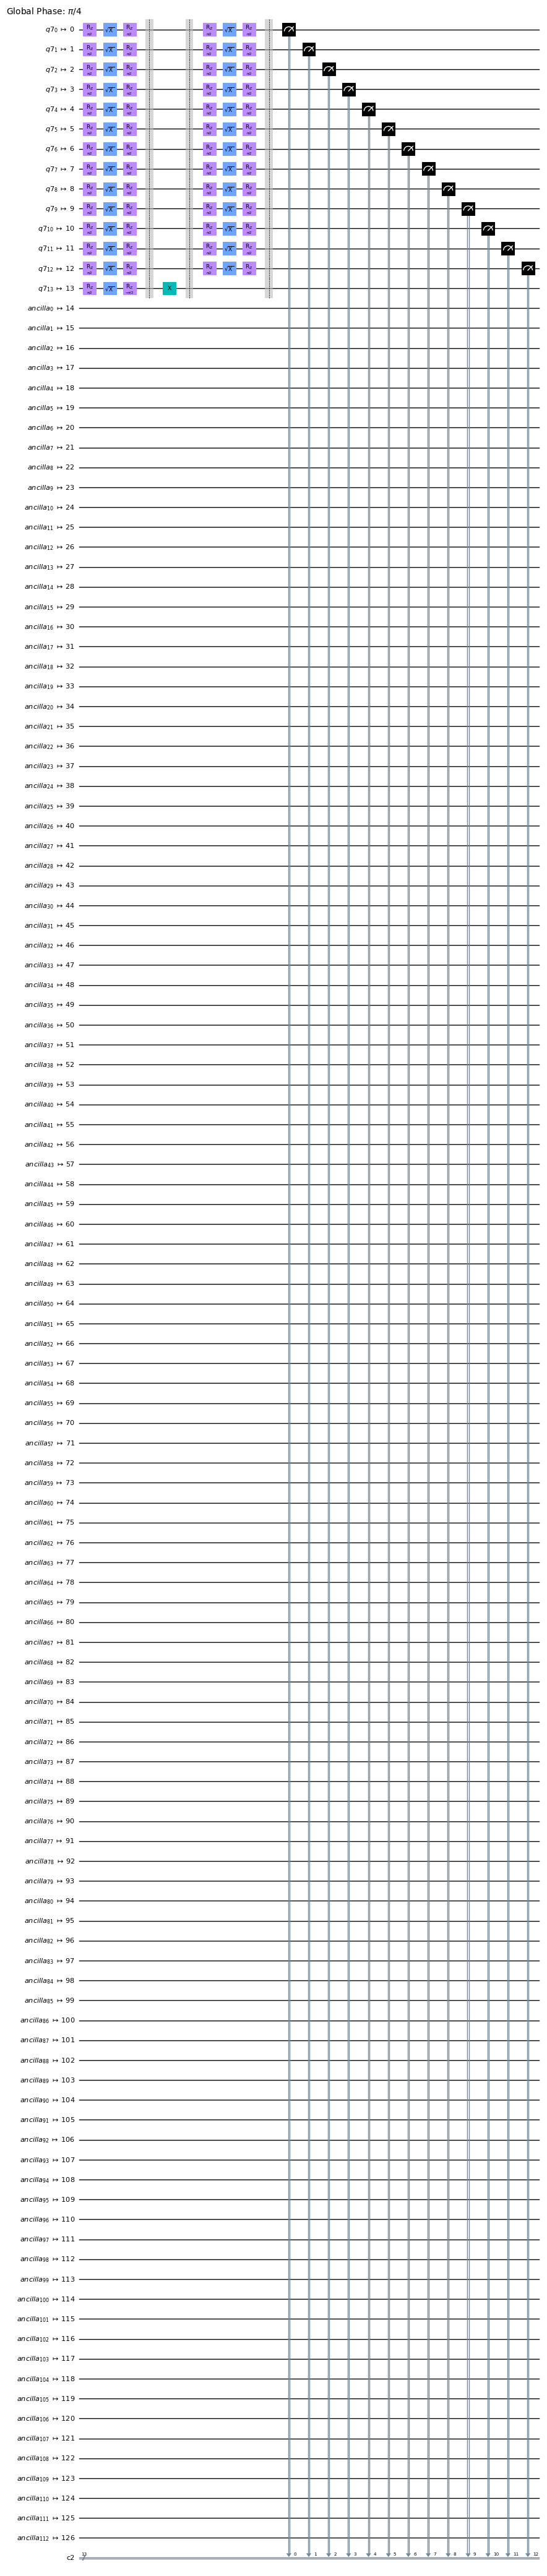

In [34]:

djCompiled.draw(output='mpl',scale=0.5)

In [ ]:
job = execute(djCompiled, backend=backend, shots=1024)
job_monitor(job)

Job Status: job is queued (None)

In [ ]:
results = job.result()
answer = results.get_counts()

threshold = int(0.01 * shots) 
filteredAnswer = {k: v for k,v in answer.items() if v >= threshold} # filter the answer for better view of plots

removedCounts = np.sum([ v for k,v in answer.items() if v < threshold ]) # number of counts removed 
filteredAnswer['other_bitstrings'] = removedCounts  # the removed counts are assigned to a new index

plot_histogram(filteredAnswer)

In [ ]:
print(filteredAnswer)